# Clase 10 - Reconocimiento de Patrones en Imagenes

En esta clase se realiza un repaso de los conceptos y técnicas vistos a lo largo del curso de Reconocimiento de Patrones en Imágenes. Se revisan los principales métodos de procesamiento, segmentación, extracción de características y análisis de patrones en imágenes digitales.

## Temas clave de repaso
- Carga y visualización de imágenes
- Conversión de formatos de color y escalas de grises
- Cálculo y visualización de histogramas
- Segmentación y umbralización
- Extracción de regiones y etiquetado
- Cálculo de momentos y centro de masa
- Análisis de textura (GLCM)
- Extracción de características y agrupamiento
- Aplicaciones prácticas y ejemplos integradores

In [1]:
from itertools import combinations

conjunto = [1,2,3,4,5,6]
combinaciones = list(combinations(conjunto, 2))
print(combinaciones)

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 3), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6), (5, 6)]


In [2]:
from skimage.io import imread_collection

images = imread_collection('../IMG/texturas_fisher/textura_*.tif')
print(images)

['../IMG/texturas_fisher/textura_1.tif', '../IMG/texturas_fisher/textura_2.tif', '../IMG/texturas_fisher/textura_3.tif', '../IMG/texturas_fisher/textura_4.tif', '../IMG/texturas_fisher/textura_5.tif', '../IMG/texturas_fisher/textura_6.tif', '../IMG/texturas_fisher/textura_7.tif', '../IMG/texturas_fisher/textura_8.tif', '../IMG/texturas_fisher/textura_9.tif', '../IMG/texturas_fisher/textura_10.tif', '../IMG/texturas_fisher/textura_11.tif', '../IMG/texturas_fisher/textura_12.tif', '../IMG/texturas_fisher/textura_13.tif', '../IMG/texturas_fisher/textura_14.tif', '../IMG/texturas_fisher/textura_15.tif']


In [3]:
import cv2
from skimage.feature import graycomatrix, graycoprops
from sklearn.preprocessing import MinMaxScaler

#funcion que extrae las caracteristicas
def extraccion_textura(imagen, features):

    gray = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)

    columna =  gray.reshape(-1,1)

    # parte del codigo donde modificamos
    # los niveles de intensidad
    nueva_escala =  (0,20)
    niveles = max(nueva_escala)+1

    resultado = MinMaxScaler(nueva_escala).fit_transform(columna).astype(int)
    resultado = resultado.reshape(gray.shape)


    #calculamos la matriz de co-ocurrencia
    comat = graycomatrix(resultado, angles=[0],distances=[2], levels=niveles)

    S = []
        # para cada imagen extraemos las caracteristicas definidas en la lista features
    for ft in features:
        sts = graycoprops(comat, ft).squeeze()
        S.append(float(sts))

    return S

**Nota importante:**
Para mejorar la clasificación de texturas por características, es fundamental experimentar con los siguientes parámetros en la función de extracción de características:
- `nueva_escala`: Ajustar el rango de niveles de intensidad puede influir en la discriminación de texturas. Por ejemplo, cambiar `(0,20)` por otros valores según la variabilidad de las imágenes.
- Parámetros de `graycomatrix`: Modificar `angles` (orientaciones) y `distances` (distancias entre píxeles) permite analizar diferentes patrones espaciales en la textura. Probar distintos valores puede ayudar a capturar mejor las diferencias entre clases de texturas.

Estos ajustes permiten adaptar el análisis a distintos tipos de imágenes y mejorar la capacidad de clasificación basada en las características extraídas.

In [4]:
import pandas as pd

idx = list(map(lambda x: x.split('/')[-1], images.files))

data = []
caracteristicas = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
for img in images:
    features = extraccion_textura(img, caracteristicas)
    data.append(features)

df = pd.DataFrame(data , index=idx, columns=caracteristicas)
print(df)

                 contrast  dissimilarity  homogeneity    energy  correlation  \
textura_1.tif    9.068727       2.397441     0.322180  0.118077     0.215509   
textura_2.tif    8.966074       2.397472     0.320611  0.101947     0.453726   
textura_3.tif   20.930357       3.258766     0.329543  0.125374     0.389943   
textura_4.tif    8.305774       2.078184     0.403592  0.120668     0.722458   
textura_5.tif    9.645131       2.196130     0.402501  0.127009     0.695608   
textura_6.tif    7.023034       1.873096     0.438612  0.146406     0.728101   
textura_7.tif    9.409395       2.457335     0.313290  0.103297     0.409168   
textura_8.tif    9.958146       2.521879     0.308700  0.100788     0.401379   
textura_9.tif    9.644382       2.499064     0.307178  0.107567     0.306702   
textura_10.tif  18.792567       3.052599     0.354815  0.144108     0.468747   
textura_11.tif  15.142423       3.038211     0.284295  0.111480     0.031845   
textura_12.tif  16.443529       3.151765

/tmp/ipykernel_30023/717059852.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


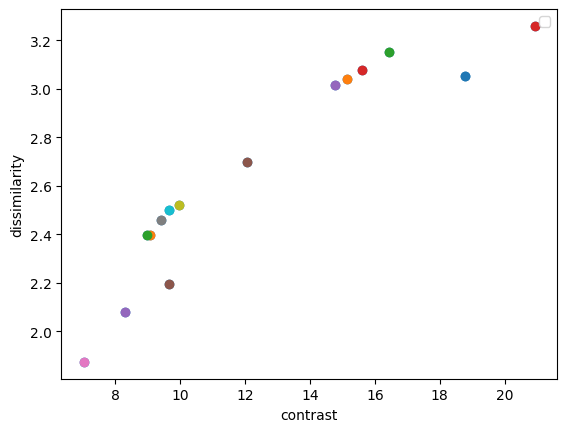

In [5]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['contrast'],df['dissimilarity'])
for i in range(len(idx)):
    x = df.loc[idx[i],'contrast']
    y = df.loc[idx[i],'dissimilarity']

    plt.scatter(x,y)

plt.xlabel('contrast')
plt.ylabel('dissimilarity')
plt.legend()
plt.show()

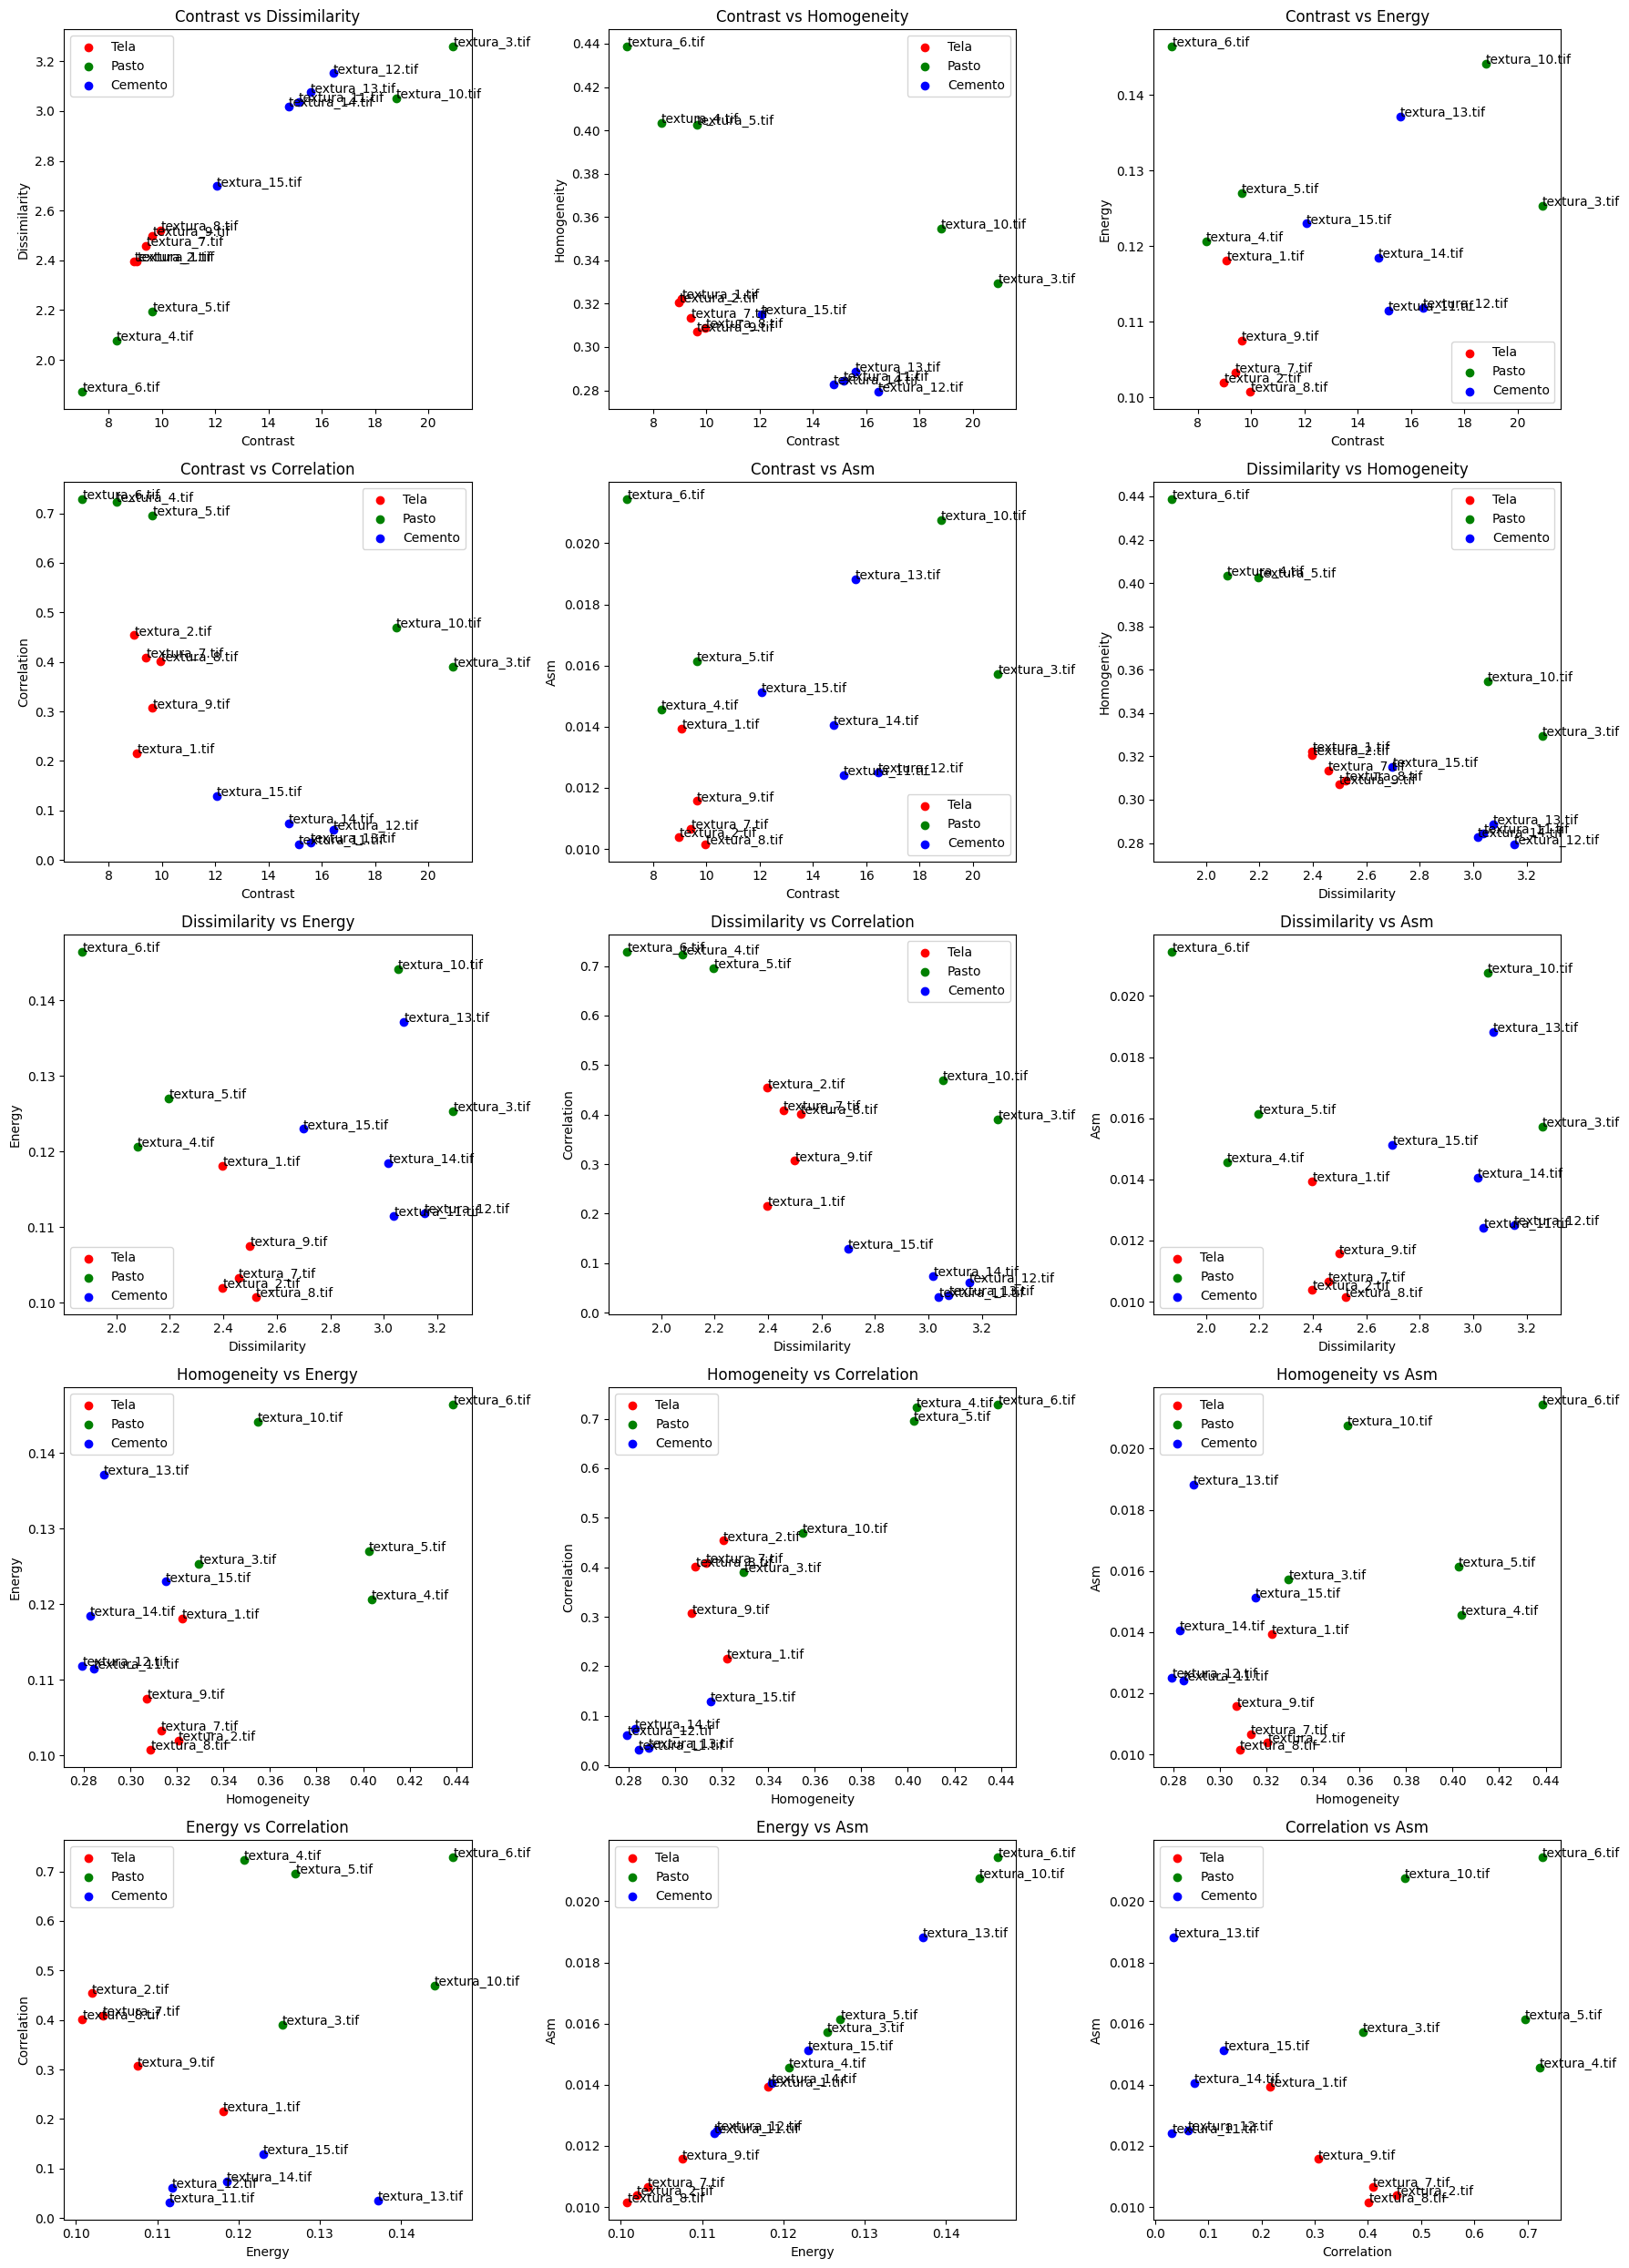

In [6]:
combinaciones = list(combinations(caracteristicas, 2))

tela = [9,8,7,2,1]
pasto = [6,5,4,3,10]
cemento = [15,14,13,12,11]


n = len(combinaciones)
ncols = 3
nrows = (n + ncols - 1) // ncols

fig, axs = plt.subplots(nrows, ncols, figsize=(6*ncols, 5*nrows))
axs = axs.flatten()

for ax, (feat_x, feat_y) in zip(axs, combinaciones):
    for grupo, color, nombre in zip([tela, pasto, cemento], ['red', 'green', 'blue'], ['Tela', 'Pasto', 'Cemento']):
        idx = [f'textura_{n}.tif' for n in grupo]
        ax.scatter(df.loc[idx, feat_x], df.loc[idx, feat_y], label=nombre, color=color)
        for i in idx:
            ax.annotate(i, (df.loc[i, feat_x], df.loc[i, feat_y]))
    ax.set_xlabel(feat_x.capitalize())
    ax.set_ylabel(feat_y.capitalize())
    ax.set_title(f'{feat_x.capitalize()} vs {feat_y.capitalize()}')
    ax.legend()

for ax in axs[n:]:
    ax.axis('off')

plt.tight_layout()
plt.show()